In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
num_groups = 5

precision = [0.67, 0.9, 0.45, 0.78, 0.5]
recall = [0.85, 0.87, 0.98, 0.66, 0.54]
repos = ["caffe", "llvm", "hostboost", "webrtc", "espressopp"]

In [26]:
caffe_df = pd.read_csv("classResults/caffetest_report.csv")
caffe_df["weighted_precision"] = caffe_df["precision"]*caffe_df["%"]/100
caffe_df["weighted_recall"] = caffe_df["recall"]*caffe_df["%"]/100
caffe_precision = caffe_df["weighted_precision"].sum()
caffe_recall = caffe_df["weighted_recall"].sum()
print(caffe_df)
print("weighted_precision: {}".format(caffe_precision))
print("weighted_recall: {}".format(caffe_recall))

                Author  precision    recall  support  f1-score       AUC  \
0       Sergey Karayev   0.423729  0.862069       29  0.568182  0.920310   
1         Yangqing Jia   0.400598  0.930556      288  0.560084  0.928934   
2    Sergio Guadarrama   0.288462  0.857143       35  0.431655  0.906962   
3               Kai Li   0.361624  0.933333      105  0.521277  0.932416   
4              Noiredd   0.780000  1.000000       39  0.876404  0.985480   
5               qipeng   0.465753  0.971429       35  0.629630  0.916588   
6      Jonathan L Long   0.563380  0.972222      288  0.713376  0.947151   
7         Cyprien Noel   0.439024  0.986301       73  0.607595  0.972591   
8         Jeff Donahue   0.652002  0.901013     1283  0.756545  0.925545   
9          Ronghang Hu   0.476510  0.946667       75  0.633929  0.948624   
10          Eric Tzeng   0.384615  1.000000       20  0.555556  0.930954   
11  Kevin James Matzen   0.921788  0.988024      334  0.953757  0.993852   
12      Evan

In [27]:
def get_precision_recall(filename):
    repo_df = pd.read_csv(filename)
    repo_df["weighted_precision"] = repo_df["precision"] * repo_df["%"] / 100
    repo_df["weighted_recall"] = repo_df["recall"] * repo_df["%"] / 100
    repo_precision = repo_df["weighted_precision"].sum()
    repo_recall = repo_df["weighted_recall"].sum()
    
    return repo_precision, repo_recall

In [47]:
session_df = pd.read_csv("bar_graph_sessions.csv")
#sessions = ["pion", "caffe", "hostboost"]
#report_paths = [
#    "classResults/caffetest_report.csv",
#    "classResults/piontest_report.csv",
#    "classResults/hostboot_report.csv",
#]
sessions = list(session_df["session"])
report_paths = list(session_df["report_filepath"])

In [48]:
session_precisions = []
session_recalls = []
for path in report_paths:
    precision, recall = get_precision_recall(path)
    session_precisions.append(precision)
    session_recalls.append(recall)

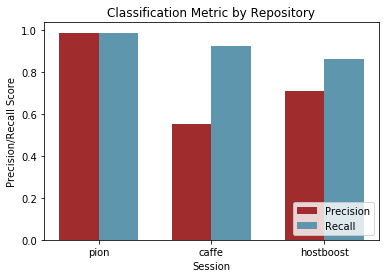

In [49]:
num_groups = len(sessions)
index = np.arange(num_groups)
bar_width = 0.35
# Red and blue
colors = ["#A02C2D", "#5E96AE"]

fig, ax = plt.subplots()
precision_rects = ax.bar(
    index, session_precisions, bar_width,
    color=colors[0], label="Precision"
)
recall_rects = ax.bar(
    index + bar_width, session_recalls, bar_width,
    color=colors[1], label="Recall"
)
ax.set_xlabel("Session")
ax.set_ylabel("Precision/Recall Score")
ax.set_title("Classification Metric by Repository")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(sessions)
ax.legend(loc="lower right")
plt.show()

In [14]:
session_df = pd.read_csv("f1_score_bar_graph_sessions.csv")
sessions = list(session_df["session"])
binary_paths = list(session_df["binary_filepath"])
multi_paths = list(session_df["multi_filepath"])
single_model_multi_paths = list(session_df["single_model_multi_filepath"])

In [4]:
print(sessions)
print(multi_paths)

['pion', 'caffe', 'hostboost']
['classResults/piontest_multi_report.csv', 'classResults/caffesession_multi_report.csv', 'classResults/hostboost_multi_report.csv']


In [10]:
def get_multi_weighted_f1_score(filename):
    repo_df = pd.read_csv(filename, index_col=0)
    return repo_df.loc['weighted avg', 'f1-score']

def get_binary_weighted_f1_score(filename):
    repo_df = pd.read_csv(filename)
    repo_support = repo_df["support"].sum()
    
    repo_df["weighted_f1_score"] = repo_df["f1-score"] * repo_df["support"] / repo_support
    repo_weighted_f1_score = repo_df["weighted_f1_score"].sum()
    
    return repo_weighted_f1_score

In [15]:
session_multi_f1_score = [get_multi_weighted_f1_score(report_path) for report_path in multi_paths]
session_single_model_multi_f1_score = [
    get_multi_weighted_f1_score(report_path) for report_path in single_model_multi_paths
]
session_binary_f1_score = [get_binary_weighted_f1_score(report_path) for report_path in binary_paths]

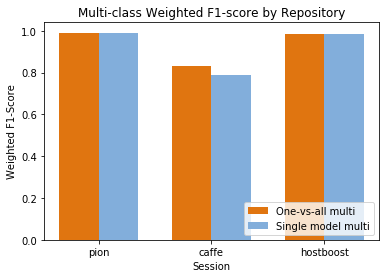

In [17]:
num_groups = len(sessions)
index = np.arange(num_groups)
bar_width = 0.35
# Orange and blue
colors = {
    "orange": "#e07510",
    "blue": "#82aedb",
}

fig, ax = plt.subplots()
multi_rects = ax.bar(
    index, session_multi_f1_score, bar_width,
    color=colors["orange"], label="One-vs-all multi"
)
single_model_rects = ax.bar(
    index + bar_width, session_single_model_multi_f1_score, bar_width,
    color=colors["blue"], label="Single model multi"
)
ax.set_xlabel("Session")
ax.set_ylabel("Weighted F1-Score")
ax.set_title("Multi-class Weighted F1-score by Repository")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(sessions)
ax.legend(loc="lower right")
plt.show()

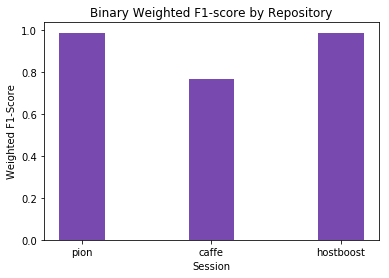

In [21]:
num_groups = len(sessions)
index = np.arange(num_groups)
bar_width = 0.35
# Orange and blue
colors = {
    "purple": "#784AAF",
}

fig, ax = plt.subplots()
binary_rects = ax.bar(
    index, session_binary_f1_score, bar_width,
    color=colors["purple"]
)
ax.set_xlabel("Session")
ax.set_ylabel("Weighted F1-Score")
ax.set_title("Binary Weighted F1-score by Repository")
ax.set_xticks(index)
ax.set_xticklabels(sessions)
#ax.legend(loc="lower right")
plt.show()